In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import seaborn as sns 
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("user_behavior_dataset.csv")



In [3]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [5]:
# checking null or missing values
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Text(0.5, 1.0, 'Gender Count vs Operating System')

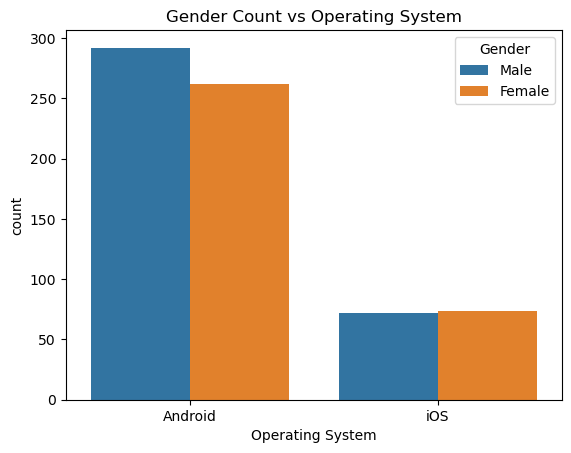

In [6]:
# Count of gender for operating systems
sns.countplot(data=df,x="Operating System",hue="Gender")
plt.title("Gender Count vs Operating System")

Text(0.5, 1.0, 'Average Screen on time per gender')

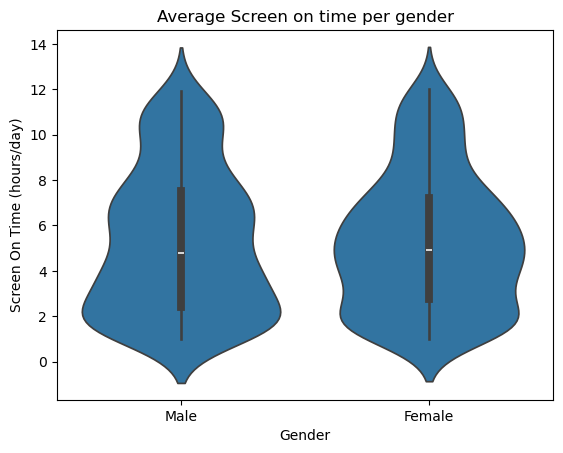

In [7]:
# Average screen on time per gender
sns.violinplot(x=df['Gender'],y=df['Screen On Time (hours/day)'])
plt.title('Average Screen on time per gender')

Text(0.5, 1.0, 'Battery drain based on screen time')

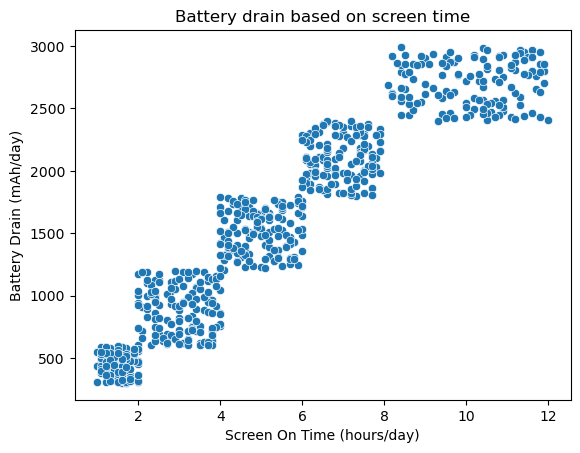

In [8]:
#Battery drain as per on screen time
sns.scatterplot(x=df['Screen On Time (hours/day)'],y=df['Battery Drain (mAh/day)'])
plt.title('Battery drain based on screen time')

Text(0.5, 1.0, 'Number of apps installed as per age')

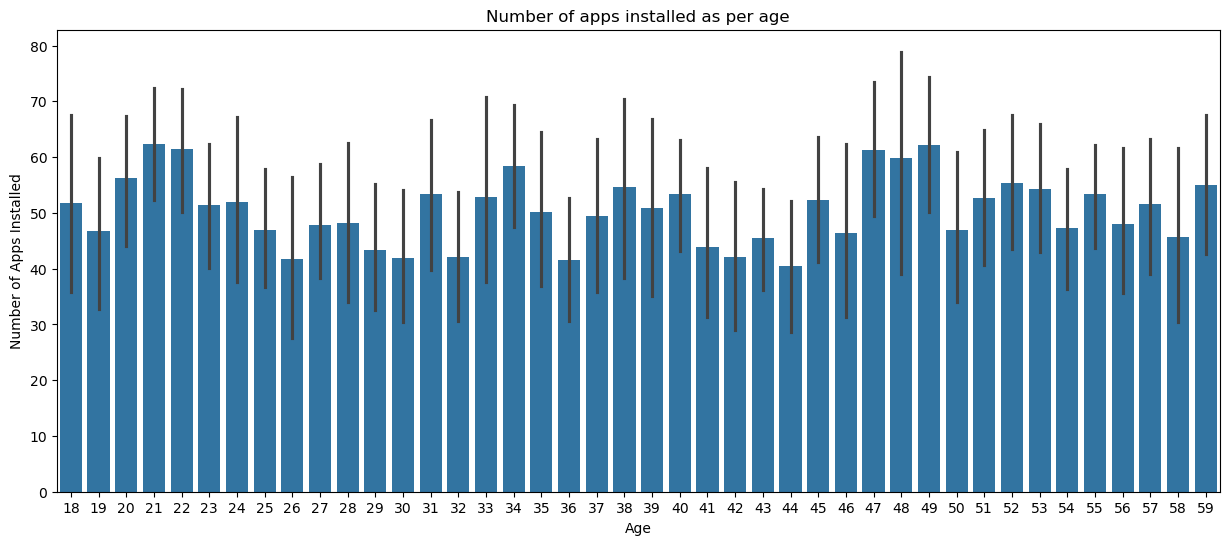

In [9]:
#Number of apps installed as per age
plt.figure(figsize=(15,6))
sns.barplot(x=df['Age'],y=df['Number of Apps Installed'])
plt.title('Number of apps installed as per age')

Text(0.5, 1.0, 'Data Usage based on age')

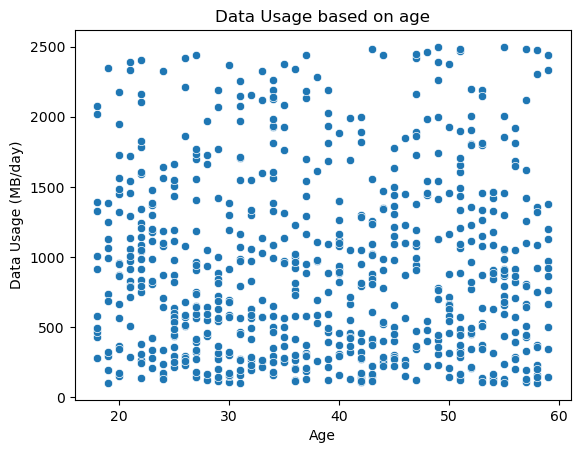

In [10]:
# Data usage as per age
sns.scatterplot(x=df['Age'],y=df['Data Usage (MB/day)'])
plt.title('Data Usage based on age')

Text(0.5, 1.0, 'Number of apps installed as per user behavior class')

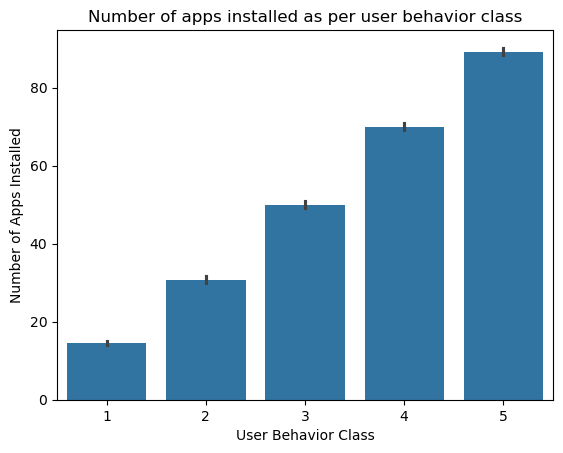

In [11]:
# Number of apps installed as per user behavior class
sns.barplot(x=df['User Behavior Class'],y=df['Number of Apps Installed'])
plt.title('Number of apps installed as per user behavior class')

Text(0.5, 1.0, 'Screen on time as per user behavior class')

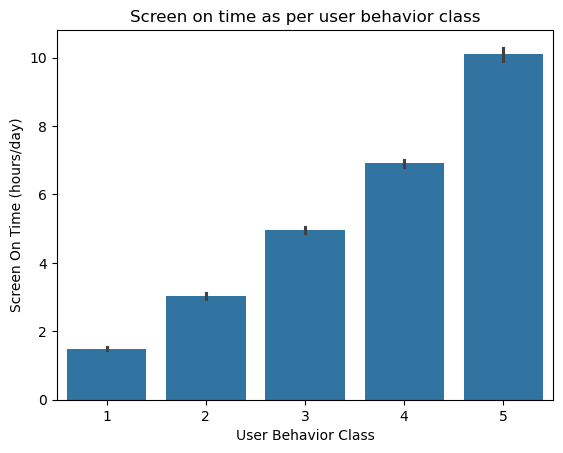

In [12]:
# Screen on time as per user behavior class
sns.barplot(x=df['User Behavior Class'],y=df['Screen On Time (hours/day)'])
plt.title('Screen on time as per user behavior class')

Text(0.5, 1.0, 'Data Usage as per user behavior class')

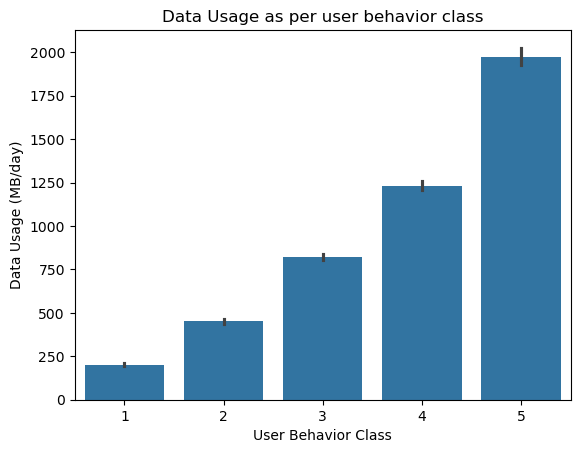

In [13]:
# Data Usage as per user behavior class
sns.barplot(x=df['User Behavior Class'],y=df['Data Usage (MB/day)'])
plt.title('Data Usage as per user behavior class')

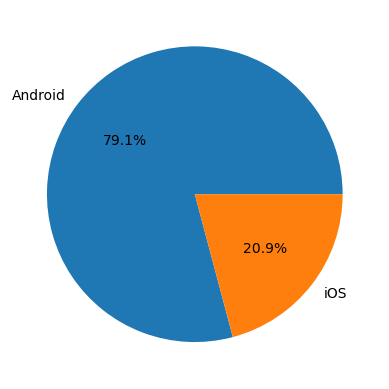

In [14]:
# Count of operating system
labels = df['Operating System'].value_counts().index 
sizes = df['Operating System'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Of Numerical Features')

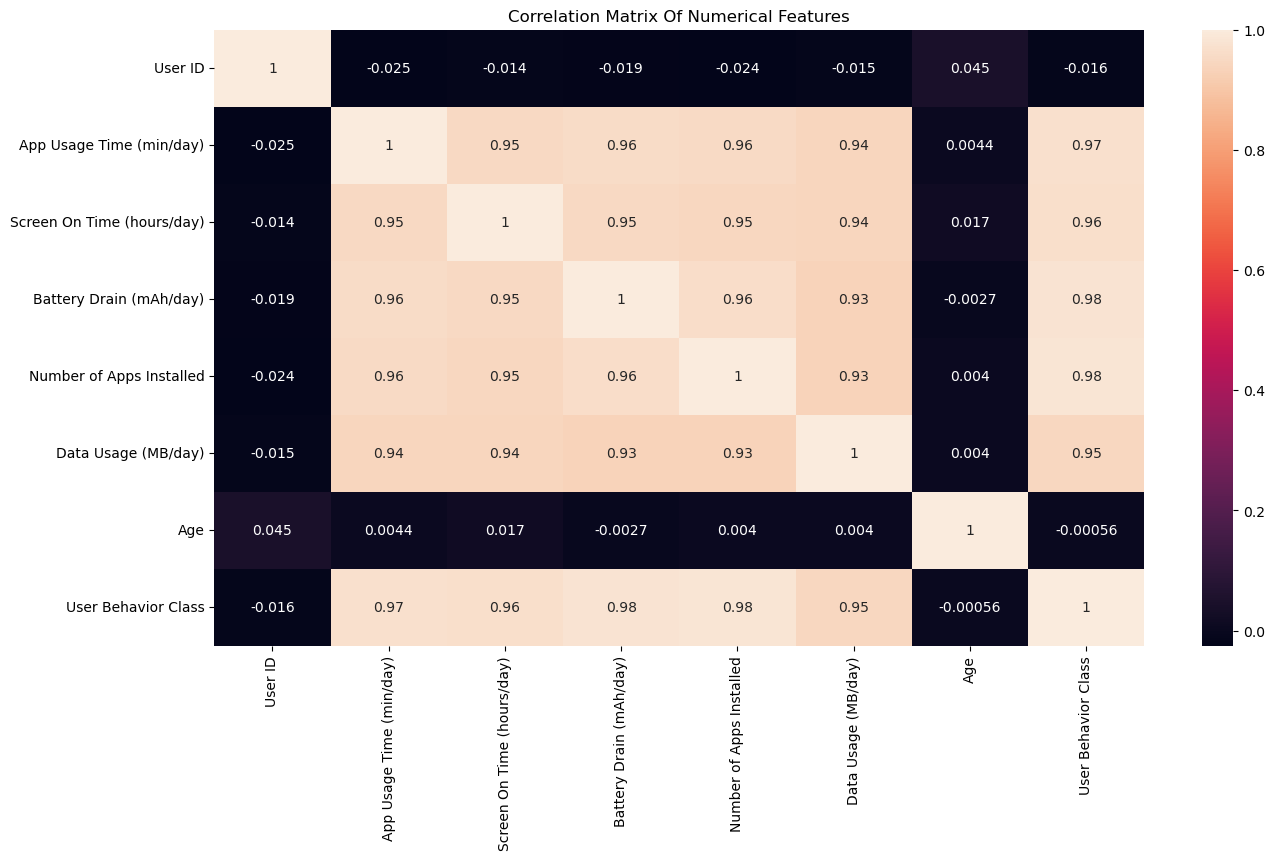

In [15]:
# Heat map correlation 
plt.figure(figsize=(15,8))
corr_matrix=df.select_dtypes(include=["int64","float64"]).corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix Of Numerical Features")

In [16]:
## From the above analysis, it shows that User behavior class is the most important feature as all other features are
## highly correlated with User behavior class feature. So, we can make User behavior class as independent feature for regression analysis.

## We will predict User behavior class using regression models

In [17]:
#filtering numerical features
num_features = df.select_dtypes(include=["int64","float64"])
num_features

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
0,1,393,6.4,1872,67,1122,40,4
1,2,268,4.7,1331,42,944,47,3
2,3,154,4.0,761,32,322,42,2
3,4,239,4.8,1676,56,871,20,3
4,5,187,4.3,1367,58,988,31,3
...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2
696,697,316,6.8,1965,68,1201,59,4
697,698,99,3.1,942,22,457,50,2
698,699,62,1.7,431,13,224,44,1


In [ ]:
## Linear Regression

In [19]:
model = LinearRegression()

In [20]:
x= num_features.drop(columns='User Behavior Class')
y = df['User Behavior Class']

In [21]:
x

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
0,1,393,6.4,1872,67,1122,40
1,2,268,4.7,1331,42,944,47
2,3,154,4.0,761,32,322,42
3,4,239,4.8,1676,56,871,20
4,5,187,4.3,1367,58,988,31
...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22
696,697,316,6.8,1965,68,1201,59
697,698,99,3.1,942,22,457,50
698,699,62,1.7,431,13,224,44


In [22]:
y

0      4
1      3
2      2
3      3
4      3
      ..
695    2
696    4
697    2
698    1
699    3
Name: User Behavior Class, Length: 700, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 7)
(140, 7)
(560,)
(140,)


In [26]:
model.fit(x_train, y_train)

LinearRegression()

In [27]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9849420512531215
intercept: 0.47985774413096216
slope: [ 6.66860105e-05  1.23583231e-03  6.77447423e-02  5.15335748e-04
  1.95892333e-02  5.10201838e-05 -9.13951336e-04]


In [28]:
y_pred = model.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[4.10752811 1.12801118 1.15931641 2.07716812 3.09263335 2.00095547
 1.77089117 1.05580834 3.85657745 2.81933734 1.2475371  1.15610112
 1.95584297 1.16851443 2.5866109  4.00750021 4.8988393  1.03980506
 2.79383882 1.93686399 4.9706511  3.86527087 2.61395188 4.02171649
 3.79633121 2.03230909 3.1833483  4.87205856 1.83625041 4.88138341
 1.1367813  2.86940775 1.16777962 2.81913881 3.96337236 5.05344551
 5.12681428 1.27868531 1.34033587 2.13939628 2.91397104 4.01377237
 1.10861318 3.09639597 2.11672302 5.07131935 2.99006504 2.77598332
 1.18117805 3.04729356 2.1600894  1.98461812 1.69272632 1.17531198
 5.20953313 4.93958101 3.04144659 1.11999499 3.78540718 2.17299413
 3.07519448 1.97175722 1.23545592 1.77364404 5.09862592 2.17321444
 5.01618284 1.1604154  5.05055546 5.15395788 1.11393852 1.93842346
 2.72762759 1.84244814 2.93482853 1.97041738 5.24011709 3.86619256
 3.89740098 4.00175224 1.74652377 1.16253232 3.71766273 2.93004872
 3.79810145 4.26463173 5.10144267 2.866465

In [29]:
## Logistic Regression

In [30]:
model_log = LogisticRegression()

In [31]:
model_log.fit(x_train,y_train)

C:\Users\asiab\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predict = model_log.predict(x_test)

In [33]:
predict

array([3, 1, 1, 3, 3, 3, 2, 1, 4, 4, 1, 2, 2, 2, 2, 4, 5, 1, 2, 2, 5, 3,
       3, 4, 4, 3, 3, 5, 2, 5, 2, 3, 2, 3, 5, 4, 4, 1, 1, 3, 4, 4, 1, 3,
       2, 5, 2, 4, 1, 3, 2, 2, 3, 2, 5, 5, 2, 1, 4, 3, 3, 3, 1, 4, 4, 3,
       5, 2, 5, 5, 1, 4, 3, 3, 3, 1, 4, 4, 4, 3, 2, 1, 3, 4, 4, 3, 5, 3,
       4, 2, 1, 3, 2, 2, 5, 2, 2, 1, 4, 4, 3, 4, 1, 1, 3, 4, 5, 2, 4, 5,
       5, 4, 5, 4, 3, 2, 4, 3, 4, 3, 2, 4, 5, 3, 4, 3, 2, 4, 3, 5, 2, 2,
       2, 3, 2, 3, 4, 2, 1, 2], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
#Logistic regression prediction analysis
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Predicted 1','Predicted 2','Predicted 3','Predicted 4','Predicted 5'], index = ['Actual 1','Actual 2','Actual 3','Actual 4','Actual 5'])

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,18,9,0,0,0
Actual 2,1,16,10,2,0
Actual 3,0,8,18,8,0
Actual 4,0,0,8,15,4
Actual 5,0,0,0,8,15


In [36]:
from sklearn.metrics import classification_report,accuracy_score

In [37]:
# Logistic regression accuracy score
print(accuracy_score(y_test,predict))

0.5857142857142857


Text(0.5, 1.0, 'data usage as per age')

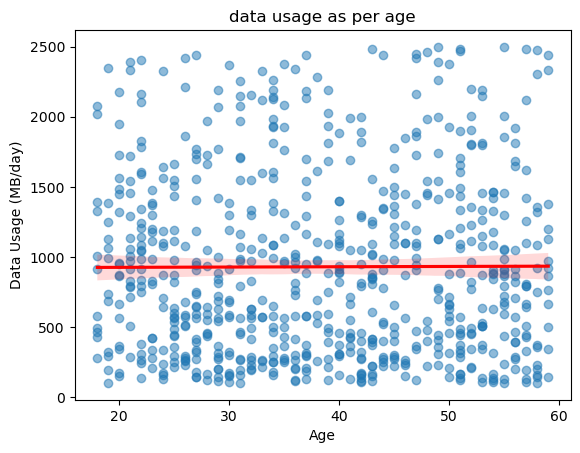

In [39]:
sns.regplot(x="Age",y="Data Usage (MB/day)",data=df,scatter_kws={"alpha":0.5},line_kws={"color":"red"})
plt.title("data usage as per age")

C:\Users\asiab\AppData\Local\Temp\ipykernel_24548\3232848145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="User Behavior Class",y="Data Usage (MB/day)",data=df,palette="Pastel2")


Text(0.5, 1.0, 'Data Usage By User Behavior Class')

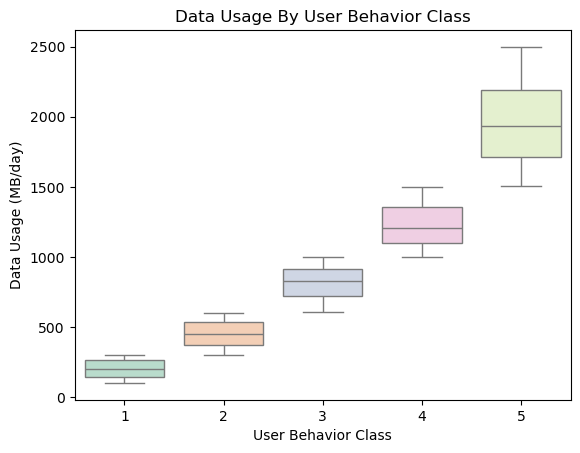

In [41]:
sns.boxplot(x="User Behavior Class",y="Data Usage (MB/day)",data=df,palette="Pastel2")
plt.title("Data Usage By User Behavior Class")